# Лабораторна робота №4: Кластеризацiя засобами бiблiотеки Scikit-Learn Python
Варіант 24

### Звiт має мiстити:
• Результати по кожному пункту ходу виконання роботи, в тому числi
порiвняльний аналiз кiлькох моделей,

• Опис методу кластеризацiї, який використовувався,

• Опис метрик якостi кластеризацiї, за якими порiвнювалися моделi.

Бажано опрацювати матерiал https://scikit-learn.org/stable/modules/clustering.html. За цим посиланням є описи методiв кластеризацiї, якi не увiйшли до
лекцiй, приклади використання методiв, опис метрик якостi. Заданi за варiантом набори даних розглядати без еталонних значень цiльової змiнної пiд час виконання кластеризацiї даних. Еталоннi значення цiльової змiнної можуть бути використанi при розрахунку окремих метрик якостi кластеризацiї.

### Хiд виконання роботи:

1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до мiльйона).

6. Побудувати кiлька альтернативних моделей:

• шляхом змiни значень параметрiв основної моделi,

• використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,

• задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.

7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом)

8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):

9. Зробити висновки про якiсть роботи моделей на дослiджених даних та
про швидкодiю методу.

10. Оцiнити результати кластеризацiї на основi метрик якостi та на основi
неформальних методiв. У кожному варiантi задано два набори даних. Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.

## Завдання

Алгоритм k-середнiх, використати `cluster.KMeans` i `cluster.MiniBatchKMeans`.
Вiдобразити графiчно центри кластерiв.

Метрики якостi: `Adjusted Rand Index`, `Calinski-Harabasz Index`, `Davies-
Bouldin index`.

Чи є розбиття стабiльним на пiдвибiрках даних?

# Import Libraries & Load Data

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics


In [110]:
# dataset A
X, Y = make_moons(n_samples=500)

In [111]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [112]:
X.shape, Y.shape

((500, 2), (500, 1))

In [113]:
data = pd.concat([X,Y], axis=1, join="inner")
data.columns = ['X1','X2','Y']
data.head()

,X1,X2,Y
0,0.893003,0.450051,0
1,-0.584719,0.811236,0
2,1.999920,0.487383,1
3,-0.691323,0.722546,0
4,0.281830,-0.195867,1


# Exploratory Data Analysis (Data Visualization)

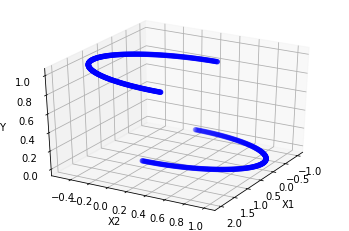

In [70]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['X1'].to_numpy(), data['X2'].to_numpy(), data['Y'].to_numpy(), c="b")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 30)
plt.show()

In [71]:
data.describe()

,X1,X2,Y
count,500.000000,500.000000,500.000000
mean,0.500000,0.250000,0.500000
std,0.868048,0.493918,0.500501
min,-1.000000,-0.499980,0.000000
25%,-0.001577,-0.204873,0.000000
50%,0.500000,0.250000,0.500000
75%,1.001577,0.704873,1.000000
max,2.000000,0.999980,1.000000


Дізнаємося, які класи присутні в даних

In [72]:
data['Y'].value_counts()

0    250
1    250
Name: Y, dtype: int64

Як бачимо, наш датасет збалансований

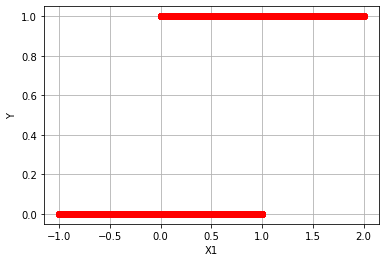

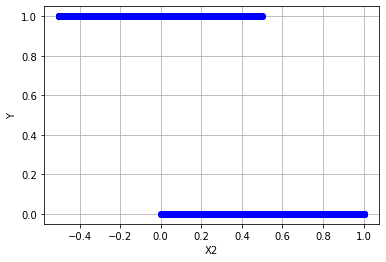

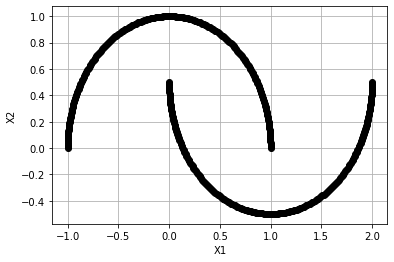

In [73]:
plt.plot(data.X1, data.Y, 'ro', label = 'X1, Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(data.X2, data.Y, 'bo', label = 'X2, Y')
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(data.X1, data.X2, 'ko', label = 'X1, X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [74]:
data.corr()

,X1,X2,Y
X1,1.000000,-0.448792,0.576582
X2,-0.448792,1.000000,-0.778366
Y,0.576582,-0.778366,1.000000


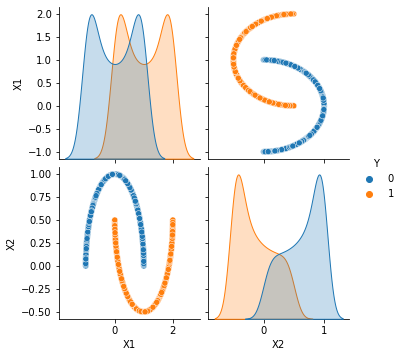

In [75]:
sns.pairplot(data=data, hue='Y')
plt.show()

# Split data into train and test

In [114]:
def split_data(X, y, fraction):
    split = np.random.rand(X.shape[0]) > fraction

    X_Train = X[split]
    y_Train = y[split]
    X_Test =  X[~split]
    y_Test = y[~split]

    return X_Train, y_Train, X_Test, y_Test

In [115]:
X_Train, y_Train, X_Test, y_Test = split_data(data[['X1', 'X2']], data['Y'], fraction = 0.1)

In [116]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((449, 2), (449,), (51, 2), (51,))

# Build KMeans clustering model

In [117]:
%%time
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_Train)

CPU times: user 71.1 ms, sys: 0 ns, total: 71.1 ms
Wall time: 42.8 ms


In [119]:
X_Train["Y_pred"] = kmeans.labels_
X_Test["Y_pred"] = kmeans.predict(X_Test)

In [120]:
kmeans.cluster_centers_

array([[-0.1874605 ,  0.58446924],
       [ 1.19117242, -0.09710371]])

Зобразимо центри кластерів:

In [121]:
data0 = X_Train[X_Train["Y_pred"] ==0]
data1 = X_Train[X_Train["Y_pred"] ==1]

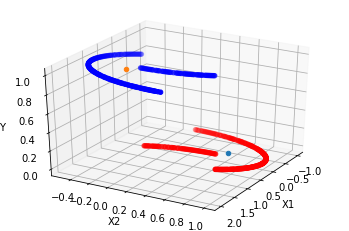

In [122]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data0['X1'].to_numpy(), data0['X2'].to_numpy(), data0['Y_pred'].to_numpy(), c="r")
ax.scatter3D(data1['X1'].to_numpy(), data1['X2'].to_numpy(), data1['Y_pred'].to_numpy(), c="b")
ax.scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1], 0 )
ax.scatter(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1], 1 )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 30)
plt.show()

# Build MiniBatchKMeans Clustering Model

In [123]:
%%time
minibkmeans = MiniBatchKMeans(n_clusters=2, random_state=0).fit(X_Train)

CPU times: user 40.1 ms, sys: 0 ns, total: 40.1 ms
Wall time: 32.2 ms


In [124]:
X_Train["Y_pred2"] = minibkmeans.labels_
X_Test["Y_pred2"] = minibkmeans.predict(X_Test)

In [125]:
data0 = X_Train[X_Train["Y_pred2"] ==0]
data1 = X_Train[X_Train["Y_pred2"] ==1]

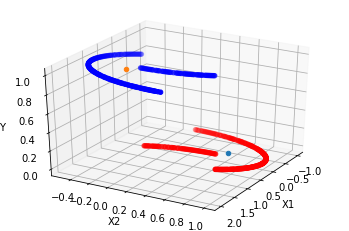

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data0['X1'].to_numpy(), data0['X2'].to_numpy(), data0['Y_pred2'].to_numpy(), c="r")
ax.scatter3D(data1['X1'].to_numpy(), data1['X2'].to_numpy(), data1['Y_pred2'].to_numpy(), c="b")
ax.scatter(minibkmeans.cluster_centers_[0][0], minibkmeans.cluster_centers_[0][1], 0 )
ax.scatter(minibkmeans.cluster_centers_[1][0], minibkmeans.cluster_centers_[1][1], 1 )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 30)
plt.show()

# Evaluation

* Adjusted Rand Index
* Calinski-Harabasz Index
* Davies- Bouldin index

Evaluation for KMeans

In [90]:
metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"])

0.07079646017699115

In [93]:
metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"])

27.36901169469768

In [92]:
metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

0.44236401133229014

Evaluation for MiniBatchKMeans

In [95]:
metrics.adjusted_rand_score(y_Test, X_Test["Y_pred2"])

0.07079646017699115

In [96]:
metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred2"])

27.36901169469768

In [97]:
metrics.davies_bouldin_score(X_Test, X_Test["Y_pred2"])

0.44236401133229014

# Оцiнимо швидкодiю методів на великих наборах даних

In [100]:
Xm, Ym = make_moons(n_samples=1000000)

In [104]:
Xm = pd.DataFrame(Xm)
Ym = pd.DataFrame(Ym)

In [108]:
datam = pd.concat([Xm,Ym], axis=1, join="inner")
datam.columns = ['X1','X2','Y']
datam.head()

,X1,X2,Y
0,0.942615,0.333881,0
1,-0.681935,0.731412,0
2,0.007467,0.378027,1
3,-0.948930,0.315488,0
4,-0.617201,0.786806,0


In [106]:
%%time
kmeans = KMeans(n_clusters=2, random_state=0).fit(datam)

CPU times: user 5.7 s, sys: 1.11 s, total: 6.81 s
Wall time: 4.05 s


In [107]:
%%time
minibkmeans = MiniBatchKMeans(n_clusters=2, random_state=0).fit(datam)

CPU times: user 354 ms, sys: 147 ms, total: 501 ms
Wall time: 284 ms


# Побудуємо кiлька альтернативних моделей

In [154]:
%%time
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100000, tol=0.0001).fit(X_Train)

CPU times: user 208 ms, sys: 399 µs, total: 208 ms
Wall time: 186 ms


In [155]:
X_Train["Y_pred"] = kmeans.labels_
X_Test["Y_pred"] = kmeans.predict(X_Test)

metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"]), metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"]), metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

(0.26083499397491744, 228.7891228678533, 0.39863166159858343)

In [140]:
%%time
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, tol=0.01).fit(X_Train)

CPU times: user 35.3 ms, sys: 0 ns, total: 35.3 ms
Wall time: 24 ms


In [141]:
X_Train["Y_pred"] = kmeans.labels_
X_Test["Y_pred"] = kmeans.predict(X_Test)

metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"]), metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"]), metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

(0.15293440255116228, 136.7436001077425, 0.578555871810926)

In [146]:
%%time
kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=0.1).fit(X_Train)

CPU times: user 74.9 ms, sys: 110 µs, total: 75.1 ms
Wall time: 172 ms


In [147]:
X_Train["Y_pred"] = kmeans.labels_
X_Test["Y_pred"] = kmeans.predict(X_Test)

metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"]), metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"]), metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

(0.15293440255116228, 136.7436001077425, 0.5785558718109262)

In [156]:
%%time
minibkmeans = MiniBatchKMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=100, tol=0.0001, batch_size=2048).fit(X_Train)

CPU times: user 201 ms, sys: 246 µs, total: 201 ms
Wall time: 223 ms


In [157]:
X_Train["Y_pred"] = minibkmeans.labels_
X_Test["Y_pred"] = minibkmeans.predict(X_Test)

metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"]), metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"]), metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

(0.17750846990230065, 2317.454604523287, 0.12084964660595438)

In [159]:
%%time
minibkmeans = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, tol=0.0001, batch_size=4096).fit(X_Train)

CPU times: user 41.6 ms, sys: 820 µs, total: 42.4 ms
Wall time: 30.6 ms


In [153]:
X_Train["Y_pred"] = minibkmeans.labels_
X_Test["Y_pred"] = minibkmeans.predict(X_Test)

metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"]), metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"]), metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

(0.25945614695697755, 110.62394801424068, 0.5658644618959512)

# Чи є розбиття стабiльним на пiдвибiрках даних?

In [167]:
X_Train2, y_Train2, X_Test2, y_Test2 = split_data(X_Train[['X1', 'X2']], y_Train, fraction = 0.4)

In [170]:
%%time
minibkmeans = MiniBatchKMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=100, tol=0.0001, batch_size=2048).fit(X_Train2)

CPU times: user 376 ms, sys: 1.21 ms, total: 377 ms
Wall time: 385 ms


In [172]:
X_Train2["Y_pred"] = minibkmeans.labels_
X_Test2["Y_pred"] = minibkmeans.predict(X_Test2)

metrics.adjusted_rand_score(y_Test, X_Test["Y_pred"]), metrics.calinski_harabasz_score(X_Test, X_Test["Y_pred"]), metrics.davies_bouldin_score(X_Test, X_Test["Y_pred"])

(0.17750846990230065, 2097.530959045939, 0.11466567444936125)

Як бачимо, розбиття не є стабільним.
Якість роботи моделей не дуже хороша, схоже що KMeans - не найкращий алгоритм для таких даних